![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [5]:
my_folder = "/content/drive/MyDrive/ConcentracionAI/B2/SAS_Edu"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ConcentracionAI/B2/SAS_Edu


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [6]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.7.15


In [7]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [8]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [9]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
#'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [10]:
%%writefile .authinfo
oda user a01251534@tec.mx password Lalo140201$

Overwriting .authinfo


Copy this file to home

In [11]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [12]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/ConcentracionAI/B2/SAS_Edu/sascfg_personal.py")
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 4536



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/ConcentracionAI/B2/SAS_Edu/sascfg_personal.py
WORK Path             = /saswork/SAS_workDA3800018189_odaws04-usw2.oda.sas.com/SAS_workCE7200018189_odaws04-usw2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 98697


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [13]:

ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 07:06:00 AM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 07:06:00 AM

33         


For local Jupyter

In [14]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

## Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [15]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd1',
libref='cortex'
)

## Merge the Data

In [16]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(5)

#data_merge.head()
df = data_merge

## Exploración

In [17]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  object 
 7   City          1000000 non-null  object 
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       336334 non-null   float64
 12  Frequency     336334 non-null   float64
 13  Seniority     336334 non-null   float64
 14  TotalGift     336334 non-null   float64
 15  MinGift       336334 non-null   float64
 16  MaxGift       336334 non-null   float64
 17  GaveLastYear  1000000 non-nu

In [18]:
data_merge.describe()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500000e+06,0.516936,46.366170,65531.654000,4.582967,0.561413,0.560556,3.039636,1.666882,4.474148,104.454055,43.130251,85.897932,0.122101,7.673015,0.122232,7.741080
std,2.886753e+05,0.499713,18.945324,61051.122343,3.325844,0.996803,1.054027,2.120722,1.052090,2.588119,303.760477,150.249476,283.581066,0.327403,82.224854,0.327554,83.110552
min,2.000001e+06,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,2.250001e+06,0.000000,30.000000,20700.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,20.000000,15.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000e+06,1.000000,46.000000,44000.000000,4.000000,0.000000,0.000000,2.000000,1.000000,4.000000,40.000000,20.000000,30.000000,0.000000,0.000000,0.000000,0.000000
75%,2.750000e+06,1.000000,61.000000,91200.000000,7.000000,1.000000,1.000000,4.000000,2.000000,6.000000,90.000000,30.000000,75.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000e+06,1.000000,90.000000,250000.000000,10.000000,10.000000,16.000000,10.000000,10.000000,10.000000,15150.000000,10000.000000,10000.000000,1.000000,10000.000000,1.000000,10000.000000


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

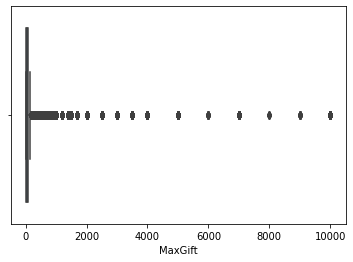

In [20]:
sns.boxplot(data=df, x="MaxGift")

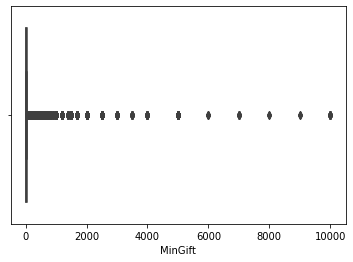

In [21]:
sns.boxplot(data=df, x="MinGift")

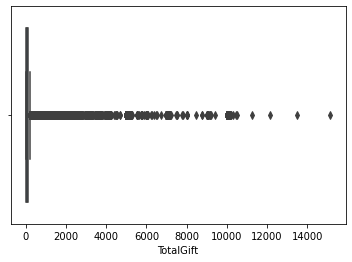

In [22]:
sns.boxplot(data=df, x="TotalGift")

In [23]:
df_dd = df.loc[(df['Recency']>0) & (df['GaveLastYear']==1)]
df_dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60922 entries, 19 to 999970
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            60922 non-null  float64
 1   LastName      60921 non-null  object 
 2   FirstName     60922 non-null  object 
 3   Woman         60922 non-null  float64
 4   Age           60922 non-null  float64
 5   Salary        60922 non-null  float64
 6   Education     60922 non-null  object 
 7   City          60922 non-null  object 
 8   SeniorList    60922 non-null  float64
 9   NbActivities  60922 non-null  float64
 10  Referrals     60922 non-null  float64
 11  Recency       60922 non-null  float64
 12  Frequency     60922 non-null  float64
 13  Seniority     60922 non-null  float64
 14  TotalGift     60922 non-null  float64
 15  MinGift       60922 non-null  float64
 16  MaxGift       60922 non-null  float64
 17  GaveLastYear  60922 non-null  float64
 18  AmtLastYear   60922 non-

In [24]:
df_dd = df.loc[(df['Recency']>0) & (df['GaveLastYear']==0)]
df_dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275412 entries, 0 to 999997
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            275412 non-null  float64
 1   LastName      275405 non-null  object 
 2   FirstName     275411 non-null  object 
 3   Woman         275412 non-null  float64
 4   Age           275412 non-null  float64
 5   Salary        275412 non-null  float64
 6   Education     275412 non-null  object 
 7   City          275412 non-null  object 
 8   SeniorList    275412 non-null  float64
 9   NbActivities  275412 non-null  float64
 10  Referrals     275412 non-null  float64
 11  Recency       275412 non-null  float64
 12  Frequency     275412 non-null  float64
 13  Seniority     275412 non-null  float64
 14  TotalGift     275412 non-null  float64
 15  MinGift       275412 non-null  float64
 16  MaxGift       275412 non-null  float64
 17  GaveLastYear  275412 non-null  float64
 18  AmtL

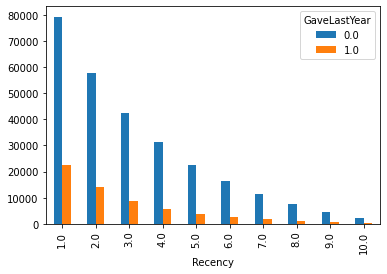

In [25]:
pd.crosstab(df['Recency'], df['GaveLastYear']).plot(kind='bar')

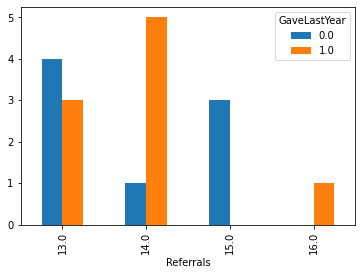

In [26]:
df_kk = df.loc[df['Referrals']>=13]
pd.crosstab(df_kk['Referrals'], df_kk['GaveLastYear']).plot(kind='bar')

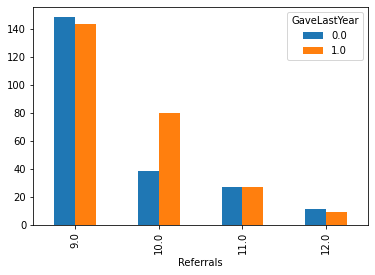

In [27]:
df_kk = df.loc[(df['Referrals']<13) & (df['Referrals']>=9)]
pd.crosstab(df_kk['Referrals'], df_kk['GaveLastYear']).plot(kind='bar')

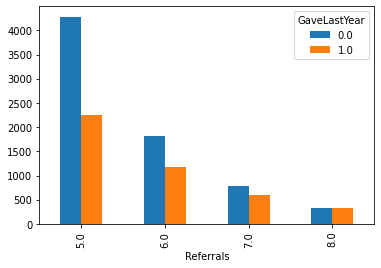

In [28]:
df_kk = df.loc[(df['Referrals']<9) & (df['Referrals']>4)]
pd.crosstab(df_kk['Referrals'], df_kk['GaveLastYear']).plot(kind='bar')

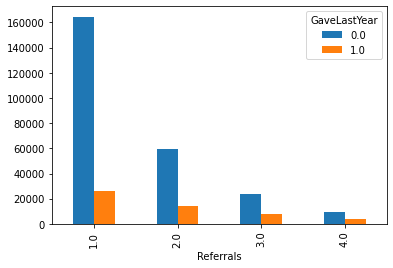

In [29]:
df_kk = df.loc[(df['Referrals']>0) & (df['Referrals']<=4)]
pd.crosstab(df_kk['Referrals'], df_kk['GaveLastYear']).plot(kind='bar')

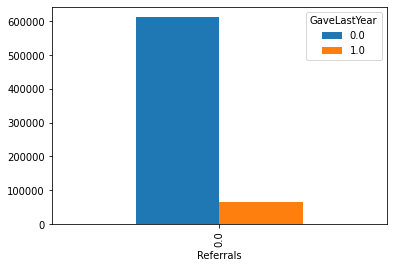

In [30]:
df_kk = df.loc[(df['Referrals']==0)]
pd.crosstab(df_kk['Referrals'], df_kk['GaveLastYear']).plot(kind='bar')

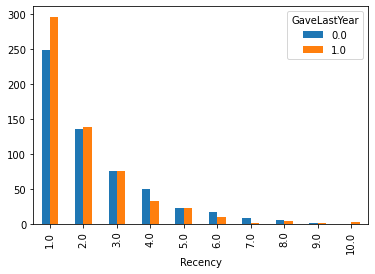

In [31]:
df_kk = df.loc[df['Referrals']>=8]
pd.crosstab(df_kk['Recency'], df_kk['GaveLastYear']).plot(kind='bar')

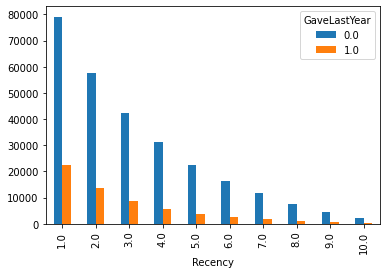

In [32]:
df_kk = df.loc[df['Referrals']<8]
pd.crosstab(df_kk['Recency'], df_kk['GaveLastYear']).plot(kind='bar')

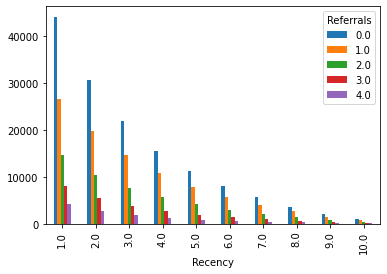

In [33]:
df_ññ = df.loc[df['Referrals']<5]
pd.crosstab(df_ññ['Recency'], df_ññ['Referrals']).plot(kind='bar')

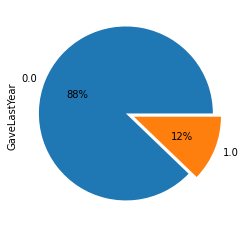

In [34]:
df_ww = df[df['Woman']==1]
df_ww['GaveLastYear'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', explode=(0.05, 0.05))

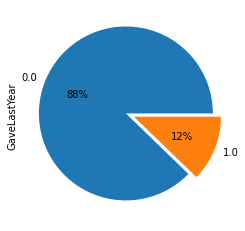

In [35]:
df_www = df[df['Woman'].isin([0])]
df_www['GaveLastYear'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', explode=(0.05, 0.05))

## Treat Missing Values

> Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.


## Drop Variables

In [36]:
df = df.drop(columns=['LastName','FirstName'])

## New Variables and *Dummies*

#### Average Gift

In [37]:
df['AvgGift'] = (df['TotalGift']/df['Frequency'])
df.sample(5)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear,AvgGift
965466,2965467.0,1.0,35.0,36000.0,University / College,Rural,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
994366,2994367.0,1.0,82.0,30000.0,University / College,Downtown,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
194217,2194218.0,0.0,61.0,192800.0,University / College,City,5.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
715179,2715180.0,0.0,74.0,39000.0,High School,Suburban,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
710067,2710068.0,0.0,48.0,153000.0,University / College,City,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN


#### Average Participation

In [38]:
df['Seniority'] = df['Seniority']+1

In [39]:
df['AvgPart'] = (df['Frequency']/df['Seniority'])
df.sample(5)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,...,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear,AvgGift,AvgPart
73508,2073509.0,1.0,74.0,8300.0,Elementary,Rural,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
774236,2774237.0,0.0,50.0,14200.0,University / College,City,10.0,3.0,3.0,4.0,...,10.0,105.0,10.0,40.0,0.0,0.0,1.0,10.0,26.250000,0.400000
121509,2121510.0,0.0,58.0,51500.0,High School,Rural,1.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88511,2088512.0,0.0,37.0,74900.0,University / College,Suburban,9.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
394320,2394321.0,1.0,65.0,13800.0,University / College,City,8.0,1.0,1.0,3.0,...,9.0,80.0,10.0,40.0,0.0,0.0,1.0,50.0,26.666667,0.333333


#### Referrals

In [40]:
df['Ref4'] = 0
df['Ref3'] = 0
df['Ref2'] = 0
df['Ref1'] = 0
df['Ref0'] = 0

In [41]:
df.loc[(df['Referrals'] >= 13), 'Ref4'] = 1
df.loc[(df['Referrals']>=9) & (df['Referrals']<13),'Ref3'] = 1
df.loc[(df['Referrals']>=5) & (df['Referrals']<9),'Ref2'] = 1
df.loc[(df['Referrals']>=1) & (df['Referrals']<5),'Ref1'] = 1
df.loc[df['Referrals']==0,'Ref0'] = 1

In [42]:
pd.set_option('display.max_columns', None)

df.sample(10)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0
51943,2051944.0,0.0,43.0,205100.0,University / College,Suburban,4.0,0.0,0.0,1.0,2.0,4.0,50.0,10.0,40.0,1.0,10.0,1.0,10.0,25.0,0.500,0,0,0,0,1
339327,2339328.0,1.0,28.0,172300.0,University / College,Suburban,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1
62032,2062033.0,0.0,63.0,3200.0,Elementary,Downtown,4.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1
814591,2814592.0,1.0,43.0,25300.0,University / College,City,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1
33410,2033411.0,0.0,54.0,195000.0,University / College,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1
503099,2503100.0,1.0,55.0,156600.0,University / College,City,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1
965926,2965927.0,1.0,30.0,35400.0,University / College,City,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,0.0,0.0,NaN,NaN,0,0,0,0,1
199074,2199075.0,0.0,20.0,3200.0,High School,Suburban,10.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1
228889,2228890.0,1.0,19.0,1300.0,High School,Suburban,9.0,0.0,0.0,7.0,1.0,8.0,25.0,25.0,25.0,0.0,0.0,0.0,0.0,25.0,0.125,0,0,0,0,1
437005,2437006.0,0.0,76.0,29500.0,High School,City,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1


#### Education

In [43]:
df['Education'].unique()

array(['University / College', 'High School', 'Elementary'], dtype=object)

In [44]:
df['University / College'] = 0
df['High School'] = 0
df['Elementary'] = 0

In [45]:
df.loc[(df['Education'] == 'University / College'), 'University / College'] = 1
df.loc[(df['Education'] == 'High School'), 'High School'] = 1
df.loc[(df['Education'] == 'Elementary'), 'Elementary'] = 1


In [46]:
df['Education'].replace(['University / College', 'High School', 'Elementary'],[2.0, 1.0,0.0], inplace=True)
df.sample(10)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary
39954,2039955.0,1.0,28.0,66900.0,2.0,Suburban,7.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,1,0,1,0,0
204001,2204002.0,1.0,74.0,1400.0,1.0,Suburban,8.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,10.0,NaN,NaN,0,0,0,1,0,0,1,0
810864,2810865.0,0.0,16.0,83100.0,1.0,Suburban,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,1,0,0,1,0
680255,2680256.0,0.0,40.0,129100.0,2.0,Suburban,6.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,1,0,1,0,0
177279,2177280.0,1.0,65.0,44200.0,2.0,Suburban,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,50.0,NaN,NaN,0,0,0,0,1,1,0,0
173166,2173167.0,0.0,69.0,4000.0,0.0,Suburban,4.0,3.0,1.0,2.0,1.0,3.0,20.0,20.0,20.0,1.0,25.0,0.0,0.0,20.0,0.333333,0,0,0,1,0,0,0,1
12652,2012653.0,1.0,47.0,113200.0,2.0,Suburban,10.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,1,0,1,0,0
717135,2717136.0,1.0,41.0,186200.0,2.0,Downtown,4.0,0.0,0.0,2.0,1.0,3.0,75.0,75.0,75.0,1.0,10.0,0.0,0.0,75.0,0.333333,0,0,0,0,1,1,0,0
267321,2267322.0,1.0,61.0,27300.0,1.0,Downtown,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,50.0,0.0,0.0,NaN,NaN,0,0,0,0,1,0,1,0
310251,2310252.0,1.0,84.0,27800.0,2.0,City,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1,1,0,0




### City


In [47]:
df['City'].unique()

array(['City', 'Rural', 'Suburban', 'Downtown'], dtype=object)

In [48]:
df['Rural'] = 0
df['Suburban'] = 0
df['Downtown'] = 0
df['Cityy'] = 0

In [49]:
df.loc[(df['City'] == 'City'), 'Cityy'] = 1
df.loc[(df['City'] == 'Rural'), 'Rural'] = 1
df.loc[(df['City'] == 'Suburban'), 'Suburban'] = 1
df.loc[(df['City'] == 'Downtown'), 'Downtown'] = 1

In [50]:
pd.set_option('display.max_columns', None)

df.sample(10)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary,Rural,Suburban,Downtown,Cityy
101957,2101958.0,1.0,37.0,168600.0,2.0,Rural,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1,1,0,0,1,0,0,0
600600,2600601.0,1.0,54.0,221900.0,2.0,Rural,7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1,1,0,0,1,0,0,0
101985,2101986.0,0.0,38.0,28200.0,1.0,City,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1,0,1,0,0,0,0,1
821817,2821818.0,1.0,38.0,18200.0,0.0,City,4.0,1.0,0.0,4.0,1.0,5.0,50.0,50.0,50.0,1.0,20.0,0.0,0.0,50.0,0.2,0,0,0,0,1,0,0,1,0,0,0,1
764506,2764507.0,0.0,61.0,41400.0,0.0,Suburban,3.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1,0,0,1,0,1,0,0
429427,2429428.0,0.0,17.0,3800.0,2.0,City,3.0,1.0,0.0,1.0,2.0,4.0,270.0,20.0,250.0,0.0,0.0,0.0,0.0,135.0,0.5,0,0,0,0,1,1,0,0,0,0,0,1
523936,2523937.0,1.0,34.0,219800.0,2.0,Downtown,10.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,1,0,1,0,0,0,0,1,0
330340,2330341.0,1.0,49.0,54200.0,2.0,Downtown,10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1,1,0,0,0,0,1,0
945470,2945471.0,0.0,28.0,39700.0,1.0,Rural,3.0,0.0,0.0,1.0,1.0,2.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,20.0,0.5,0,0,0,0,1,0,1,0,1,0,0,0
701127,2701128.0,1.0,68.0,21100.0,1.0,Suburban,2.0,1.0,0.0,1.0,1.0,2.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,20.0,0.5,0,0,0,0,1,0,1,0,0,1,0,0


In [51]:
df['City'].replace(['City', 'Suburban', 'Downtown','Rural'],[3.0,2.0, 1.0,0.0], inplace=True)
df.sample(10)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary,Rural,Suburban,Downtown,Cityy
796621,2796622.0,0.0,38.0,200.0,1.0,1.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1,0,1,0,0,0,1,0
130838,2130839.0,0.0,42.0,61900.0,2.0,3.0,10.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,10.0,NaN,NaN,0,0,0,1,0,1,0,0,0,0,0,1
950612,2950613.0,0.0,50.0,3600.0,2.0,3.0,9.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,1,0,1,0,0,0,0,0,1
675343,2675344.0,1.0,72.0,55500.0,1.0,3.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1,0,1,0,0,0,0,1
219164,2219165.0,1.0,60.0,19600.0,1.0,1.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1,0,1,0,0,0,1,0
545044,2545045.0,0.0,21.0,26200.0,2.0,2.0,7.0,2.0,2.0,1.0,3.0,5.0,50.0,10.0,30.0,0.0,0.0,0.0,0.0,16.666667,0.600,0,0,0,1,0,1,0,0,0,1,0,0
527365,2527366.0,1.0,46.0,91700.0,2.0,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,1
740831,2740832.0,1.0,73.0,21000.0,2.0,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,1
373814,2373815.0,1.0,42.0,178900.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,1,1,0,0,0,1,0,0
410216,2410217.0,0.0,38.0,199700.0,2.0,1.0,10.0,0.0,2.0,3.0,3.0,8.0,1050.0,20.0,1000.0,0.0,0.0,1.0,10.0,350.000000,0.375,0,0,0,1,0,1,0,0,0,0,1,0


## Scaler

In [52]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [53]:
df['Salary'] = MinMaxScaler().fit_transform(np.array(df['Salary']).reshape(-1,1))
df['SeniorList'] = MinMaxScaler().fit_transform(np.array(df['SeniorList']).reshape(-1,1))
df['Recency'] = MinMaxScaler().fit_transform(np.array(df['Recency']).reshape(-1,1))
df['Frequency'] = MinMaxScaler().fit_transform(np.array(df['Frequency']).reshape(-1,1))
df['Seniority'] = MinMaxScaler().fit_transform(np.array(df['Seniority']).reshape(-1,1))
df['TotalGift'] = MinMaxScaler().fit_transform(np.array(df['TotalGift']).reshape(-1,1))
df['MinGift'] = MinMaxScaler().fit_transform(np.array(df['MinGift']).reshape(-1,1))
df['MaxGift'] = MinMaxScaler().fit_transform(np.array(df['MaxGift']).reshape(-1,1))
df['AmtLastYear'] = MinMaxScaler().fit_transform(np.array(df['AmtLastYear']).reshape(-1,1))
df['AvgGift'] = MinMaxScaler().fit_transform(np.array(df['AvgGift']).reshape(-1,1))
df['AvgPart'] = MinMaxScaler().fit_transform(np.array(df['AvgPart']).reshape(-1,1))


In [54]:
df.corr()

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary,Rural,Suburban,Downtown,Cityy
ID,1.000000,-0.002832,-0.000720,-0.000759,0.002799,0.000481,0.000815,0.001128,-0.000853,0.000345,-0.001340,-0.000401,-0.001426,-0.000411,-0.001438,-0.000741,0.000066,-0.000845,-0.002595,-0.001058,-0.000735,-0.002218,0.000643,-0.003024,0.000839,-0.000149,0.003226,-0.003338,0.000117,-0.000687,0.000453,0.000105,0.000054
Woman,-0.002832,1.000000,0.037798,-0.046426,-0.020358,-0.000911,-0.000095,0.001681,-0.000138,-0.002042,-0.000956,-0.002443,0.051112,0.030785,0.050119,-0.000846,0.013658,-0.000691,0.014477,0.047359,0.002035,-0.000382,-0.000517,0.001371,-0.001132,0.000834,-0.019432,0.016049,0.010501,0.000754,0.000963,-0.000461,-0.001229
Age,-0.000720,0.037798,1.000000,0.019775,-0.110087,-0.002763,0.000349,0.000411,-0.002079,-0.000671,-0.002581,-0.001805,-0.051445,-0.029519,-0.051216,-0.001535,-0.013239,0.000379,-0.013522,-0.046969,-0.001084,-0.001501,-0.000627,0.000483,-0.001502,0.001419,-0.099194,0.074761,0.073373,0.003866,-0.001161,-0.001398,-0.001049
Salary,-0.000759,-0.046426,0.019775,1.000000,0.219474,0.005130,-0.000195,0.000421,0.000426,-0.003451,0.001889,-0.001951,0.075216,0.048340,0.074186,0.001101,0.021870,0.001416,0.022055,0.071523,0.003742,-0.000173,-0.000885,0.001540,-0.000958,0.000639,0.219566,-0.193613,-0.084801,-0.007545,0.000465,0.004274,0.002626
Education,0.002799,-0.020358,-0.110087,0.219474,1.000000,0.026248,-0.000397,0.003479,0.003377,-0.004862,0.011561,0.003865,0.024375,0.016138,0.023417,0.001765,0.007355,0.002652,0.006558,0.023277,0.007970,0.001557,0.001956,0.005074,-0.002436,0.001145,0.952996,-0.785261,-0.520063,-0.038799,0.005376,0.020281,0.011877
City,0.000481,-0.000911,-0.002763,0.005130,0.026248,1.000000,-0.000607,0.042759,0.040507,-0.016097,0.027709,0.008803,0.021925,0.010971,0.018198,0.028293,0.009823,0.028620,0.011627,0.017663,0.019461,0.000817,0.003126,0.013486,0.038163,-0.041015,0.028468,-0.027669,-0.003916,-0.796488,0.133633,-0.302813,0.775752
SeniorList,0.000815,-0.000095,0.000349,-0.000195,-0.000397,-0.000607,1.000000,0.408294,0.385607,0.409977,0.293257,0.662898,0.058632,-0.049351,0.030649,-0.000125,0.001313,-0.001315,-0.001249,-0.010824,-0.347917,0.006132,0.029387,0.122189,0.386121,-0.411589,-0.000373,0.000301,0.000222,-0.000493,0.000339,0.001522,-0.001091
NbActivities,0.001128,0.001681,0.000411,0.000421,0.003479,0.042759,0.408294,1.000000,0.527538,-0.041532,0.485541,0.337794,0.130007,-0.034664,0.085612,0.172631,0.050613,0.169830,0.048435,0.024901,0.140516,0.022496,0.091173,0.276523,0.342470,-0.406749,0.004393,-0.004933,0.001228,-0.063390,-0.010839,0.045837,0.028910
Referrals,-0.000853,-0.000138,-0.002079,0.000426,0.003377,0.040507,0.385607,0.527538,1.000000,-0.038949,0.450656,0.313620,0.117908,-0.032493,0.076919,0.160814,0.046003,0.159688,0.045224,0.021365,0.130485,0.052112,0.188361,0.524722,0.647499,-0.770303,0.003745,-0.003729,-0.000270,-0.060137,-0.009921,0.043344,0.027180
Recency,0.000345,-0.002042,-0.000671,-0.003451,-0.004862,-0.016097,0.409977,-0.041532,-0.038949,1.000000,-0.265405,0.566351,-0.072300,0.019381,-0.048954,-0.085739,-0.020735,-0.087135,-0.023791,-0.017404,-0.787408,-0.004866,-0.018159,-0.045304,0.024137,-0.006619,-0.005243,0.005052,0.000839,0.028541,0.002858,-0.020580,-0.008482


## Data Partition

In [55]:
df = df.fillna(value=0)


In [56]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(df, test_size=0.4, random_state=12345) 

#train.head()
train.sample(2)

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary,Rural,Suburban,Downtown,Cityy
776206,2776207.0,1.0,49.0,0.0616,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0,0,1,0,1,0,1,0,0,0
60038,2060039.0,1.0,62.0,0.1904,2.0,3.0,1.0,2.0,8.0,0.333333,0.222222,0.555556,0.003963,0.001001,0.002002,0.0,0.0,0.0,0.0,0.001335,0.412698,0,0,1,0,0,1,0,0,0,0,0,1


## Prebuilt Models
***

### **Linear Regression Model**


> The [sk-learn library](https://scikit-learn.org/stable/index.html ) offers more advanced models.


In [534]:
list(df.columns)

['ID',
 'Woman',
 'Age',
 'Salary',
 'Education',
 'City',
 'SeniorList',
 'NbActivities',
 'Referrals',
 'Recency',
 'Frequency',
 'Seniority',
 'TotalGift',
 'MinGift',
 'MaxGift',
 'GaveLastYear',
 'AmtLastYear',
 'GaveThisYear',
 'AmtThisYear',
 'AvgGift',
 'AvgPart',
 'Ref4',
 'Ref3',
 'Ref2',
 'Ref1',
 'Ref0',
 'University / College',
 'High School',
 'Elementary',
 'Rural',
 'Suburban',
 'Downtown',
 'Cityy']

### Reducida

In [535]:


#comment: it's numpy array

X_train = train[['Woman',
 'Age',
 'Salary',
 'City',
 'NbActivities',
 'Referrals',
 'Recency',
 'Frequency',
 'TotalGift',
 'MinGift',
 'MaxGift',
 'GaveLastYear',
 'AmtLastYear',
 'AvgGift',
 'AvgPart',
 'Rural',
 'Suburban',
 'Downtown',
 'Cityy']]
Y_train = train['AmtThisYear']
X_valid = validation[['Woman',
 'Age',
 'Salary',
 'City',
 'NbActivities',
 'Referrals',
 'Recency',
 'Frequency',
 'TotalGift',
 'MinGift',
 'MaxGift',
 'GaveLastYear',
 'AmtLastYear',
 'AvgGift',
 'AvgPart',
 'Rural',
 'Suburban',
 'Downtown',
 'Cityy']]
Y_valid = validation['AmtThisYear']

### Todas

In [57]:

X_train = train[[
 'Woman',
 'Age',
 'Salary',
 'Education',
 'City',
 'SeniorList',
 'NbActivities',
 'Referrals',
 'Recency',
 'Frequency',
 'Seniority',
 'TotalGift',
 'MinGift',
 'MaxGift',
 'GaveLastYear',
 'AmtLastYear',
 'AvgGift',
 'AvgPart',
 'Ref4',
 'Ref3',
 'Ref2',
 'Ref1',
 'Ref0',
 'University / College',
 'High School',
 'Elementary',
 'Rural',
 'Suburban',
 'Downtown',
 'Cityy']]
Y_train = train['AmtThisYear']
X_valid = validation[[
 'Woman',
 'Age',
 'Salary',
 'Education',
 'City',
 'SeniorList',
 'NbActivities',
 'Referrals',
 'Recency',
 'Frequency',
 'Seniority',
 'TotalGift',
 'MinGift',
 'MaxGift',
 'GaveLastYear',
 'AmtLastYear',
 'AvgGift',
 'AvgPart',
 'Ref4',
 'Ref3',
 'Ref2',
 'Ref1',
 'Ref0',
 'University / College',
 'High School',
 'Elementary',
 'Rural',
 'Suburban',
 'Downtown',
 'Cityy']]
Y_valid = validation['AmtThisYear']

In [631]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [89]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(objective='reg:squarederror',max_depth='3',learning_rate='0.2').fit(X_train, Y_train)
XGB_predict = xgb_model.predict(X_valid)

In [632]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

13.149621102596333
7135.708214151181
84.47312125256875


In [90]:
import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,XGB_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,XGB_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,XGB_predict)))

13.108981645126939
7598.869751548715
87.17149621033653


## **Regression Tree Model**

In [401]:
from sklearn.tree import DecisionTreeRegressor

X_train = train[['Woman',
 'Age',
 'Salary',
 'Education',
 'City',
 'SeniorList',
 'NbActivities',
 'Referrals',
 'Recency',
 'Frequency',
 'Seniority',
 'TotalGift',
 'MinGift',
 'MaxGift',
 'GaveLastYear',
 'AmtLastYear',
 'AvgGift',
 'AvgPart',
 'Ref4',
 'Ref3',
 'Ref2',
 'Ref1',
 'Ref0',
 'University / College',
 'High School',
 'Elementary',
 'Rural',
 'Suburban',
 'Downtown',
 'Cityy']]
Y_train = train['AmtThisYear']
X_valid = validation[['Woman',
 'Age',
 'Salary',
 'Education',
 'City',
 'SeniorList',
 'NbActivities',
 'Referrals',
 'Recency',
 'Frequency',
 'Seniority',
 'TotalGift',
 'MinGift',
 'MaxGift',
 'GaveLastYear',
 'AmtLastYear',
 'AvgGift',
 'AvgPart',
 'Ref4',
 'Ref3',
 'Ref2',
 'Ref1',
 'Ref0',
 'University / College',
 'High School',
 'Elementary',
 'Rural',
 'Suburban',
 'Downtown',
 'Cityy']]
Y_valid = validation['AmtThisYear']


DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data


In [402]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

13.190258053307375
7614.455970269779
87.26085015784443


### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html

***


## Scoring New Data

### Prepare data for scoring

In [91]:
data3 = sas_session.sasdata2dataframe(
table='score_rd1',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)

 ### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [92]:
scoring_data = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data[['MinGift']] = scoring_data[['MinGift']].fillna(value=0) 

sd = scoring_data
sd.head()

,ID,GaveLastYear,AmtLastYear,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift
0,2000001.0,0.0,0.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0
1,2000002.0,0.0,0.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN
2,2000003.0,0.0,0.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
3,2000004.0,0.0,0.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4,2000005.0,0.0,0.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [93]:
sd = sd.drop(columns=['LastName','FirstName'])

In [94]:
sd['AvgGift'] = (sd['TotalGift']/sd['Frequency'])
sd.sample(5)

,ID,GaveLastYear,AmtLastYear,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,AvgGift
353308,2353309.0,0.0,0.0,0.0,48.0,90000.0,High School,City,6.0,2.0,0.0,1.0,1.0,1.0,30.0,30.0,30.0,30.0
554456,2554457.0,0.0,0.0,0.0,16.0,14100.0,High School,City,5.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
909462,2909463.0,0.0,0.0,0.0,46.0,47300.0,University / College,Suburban,7.0,1.0,2.0,5.0,1.0,5.0,20.0,20.0,20.0,20.0
467957,2467958.0,0.0,0.0,1.0,78.0,20500.0,High School,Suburban,6.0,2.0,2.0,3.0,1.0,3.0,10.0,10.0,10.0,10.0
848473,2848474.0,0.0,0.0,1.0,57.0,30100.0,University / College,Suburban,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [95]:
sd['Seniority'] = sd['Seniority']+1

In [96]:
sd['AvgPart'] = (sd['Frequency']/sd['Seniority'])
sd.sample(5)

,ID,GaveLastYear,AmtLastYear,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,AvgGift,AvgPart
680033,2680034.0,0.0,0.0,1.0,34.0,10800.0,University / College,Downtown,6.0,1.0,0.0,2.0,3.0,5.0,65.0,20.0,25.0,21.666667,0.6
577717,2577718.0,0.0,0.0,1.0,37.0,249700.0,University / College,Downtown,8.0,3.0,2.0,0.0,2.0,5.0,30.0,10.0,20.0,15.000000,0.4
72225,2072226.0,0.0,0.0,1.0,76.0,18000.0,University / College,City,9.0,1.0,3.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
886649,2886650.0,0.0,0.0,0.0,30.0,41000.0,University / College,City,5.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
935849,2935850.0,0.0,0.0,0.0,33.0,32000.0,High School,Suburban,2.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [97]:
sd['Ref4'] = 0
sd['Ref3'] = 0
sd['Ref2'] = 0
sd['Ref1'] = 0
sd['Ref0'] = 0

In [98]:
sd.loc[(sd['Referrals'] >= 13), 'Ref4'] = 1
sd.loc[(sd['Referrals']>=9) & (sd['Referrals']<13),'Ref3'] = 1
sd.loc[(sd['Referrals']>=5) & (sd['Referrals']<9),'Ref2'] = 1
sd.loc[(sd['Referrals']>=1) & (sd['Referrals']<5),'Ref1'] = 1
sd.loc[sd['Referrals']==0,'Ref0'] = 1

In [99]:
pd.set_option('display.max_columns', None)

sd.sample(10)

,ID,GaveLastYear,AmtLastYear,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0
365940,2365941.0,0.0,0.0,1.0,51.0,67800.0,High School,Downtown,10.0,0.0,1.0,6.0,1.0,7.0,400.0,400.0,400.0,400.000000,0.142857,0,0,0,1,0
864406,2864407.0,0.0,0.0,1.0,89.0,58700.0,High School,Suburban,3.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1
819760,2819761.0,0.0,0.0,0.0,85.0,29700.0,High School,Suburban,6.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1
867776,2867777.0,0.0,0.0,1.0,59.0,64100.0,High School,Suburban,7.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1
123291,2123292.0,0.0,0.0,1.0,52.0,129100.0,University / College,Suburban,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1
254048,2254049.0,0.0,0.0,1.0,18.0,38700.0,High School,Suburban,6.0,1.0,1.0,3.0,1.0,4.0,175.0,175.0,175.0,175.000000,0.250000,0,0,0,1,0
449214,2449215.0,0.0,0.0,1.0,60.0,154900.0,High School,Suburban,2.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1
448532,2448533.0,0.0,0.0,0.0,38.0,36100.0,High School,Rural,9.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1
148718,2148719.0,0.0,0.0,0.0,53.0,178200.0,University / College,City,5.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1
691152,2691153.0,0.0,0.0,1.0,45.0,19600.0,University / College,City,9.0,1.0,5.0,2.0,3.0,9.0,80.0,25.0,30.0,26.666667,0.333333,0,0,1,0,0


In [100]:
sd['Education'].unique()

array(['University / College', 'High School', 'Elementary'], dtype=object)

In [101]:
sd['University / College'] = 0
sd['High School'] = 0
sd['Elementary'] = 0

In [102]:
sd.loc[(df['Education'] == 'University / College'), 'University / College'] = 1
sd.loc[(df['Education'] == 'High School'), 'High School'] = 1
sd.loc[(df['Education'] == 'Elementary'), 'Elementary'] = 1


In [103]:
sd['Education'].replace(['University / College', 'High School', 'Elementary'],[2.0, 1.0,0.0], inplace=True)
sd.sample(10)

,ID,GaveLastYear,AmtLastYear,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary
877886,2877887.0,0.0,0.0,1.0,61.0,5500.0,1.0,City,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0
125238,2125239.0,0.0,0.0,1.0,58.0,101400.0,2.0,Rural,8.0,0.0,0.0,1.0,1.0,2.0,25.0,25.0,25.0,25.0,0.500000,0,0,0,0,1,0,0,0
240446,2240447.0,0.0,0.0,1.0,22.0,7800.0,2.0,City,4.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,1,0,0,0,0
50705,2050706.0,0.0,0.0,0.0,25.0,84900.0,2.0,City,10.0,3.0,4.0,0.0,1.0,1.0,50.0,50.0,50.0,50.0,1.000000,0,0,0,1,0,0,0,0
374612,2374613.0,0.0,0.0,1.0,68.0,11400.0,2.0,City,6.0,1.0,1.0,2.0,1.0,3.0,20.0,20.0,20.0,20.0,0.333333,0,0,0,1,0,0,0,0
584166,2584167.0,0.0,0.0,0.0,39.0,30700.0,1.0,Suburban,5.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0
952437,2952438.0,0.0,0.0,1.0,35.0,239200.0,2.0,Suburban,7.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,1,0,0,0,0
957093,2957094.0,1.0,20.0,0.0,18.0,12600.0,1.0,Rural,8.0,4.0,4.0,1.0,4.0,6.0,90.0,10.0,40.0,22.5,0.666667,0,0,0,1,0,0,0,0
698685,2698686.0,0.0,0.0,1.0,36.0,3600.0,2.0,City,6.0,1.0,0.0,0.0,1.0,1.0,25.0,25.0,25.0,25.0,1.000000,0,0,0,0,1,0,0,0
633843,2633844.0,0.0,0.0,1.0,44.0,96500.0,1.0,Suburban,2.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0


In [104]:
sd['City'].unique()

array(['City', 'Rural', 'Suburban', 'Downtown'], dtype=object)

In [105]:
df['Rural'] = 0
df['Suburban'] = 0
df['Downtown'] = 0
df['Cityy'] = 0

In [106]:
sd.loc[(sd['City'] == 'City'), 'Cityy'] = 1
sd.loc[(sd['City'] == 'Rural'), 'Rural'] = 1
sd.loc[(sd['City'] == 'Suburban'), 'Suburban'] = 1
sd.loc[(sd['City'] == 'Downtown'), 'Downtown'] = 1

In [107]:
pd.set_option('display.max_columns', None)

sd['City'].replace(['Rural', 'Suburban', 'Downtown','City'],[0.0, 1.0,2.0,3.0], inplace=True)
sd.sample(10)

,ID,GaveLastYear,AmtLastYear,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary,Cityy,Rural,Suburban,Downtown
381884,2381885.0,0.0,0.0,0.0,29.0,37700.0,2.0,3.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,1.0,NaN,NaN,NaN
825796,2825797.0,0.0,0.0,0.0,48.0,61400.0,2.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,NaN,1.0,NaN,NaN
132939,2132940.0,0.0,0.0,1.0,28.0,56300.0,2.0,3.0,3.0,0.0,0.0,2.0,1.0,3.0,75.0,75.0,75.0,75.000000,0.333333,0,0,0,0,1,0,0,0,1.0,NaN,NaN,NaN
73802,2073803.0,0.0,0.0,1.0,37.0,232700.0,2.0,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,1.0,NaN,NaN,NaN
162439,2162440.0,0.0,0.0,1.0,38.0,12700.0,1.0,2.0,8.0,1.0,0.0,3.0,2.0,6.0,510.0,10.0,500.0,255.000000,0.333333,0,0,0,0,1,0,0,0,NaN,NaN,NaN,1.0
779685,2779686.0,1.0,20.0,1.0,50.0,80200.0,1.0,2.0,3.0,1.0,1.0,0.0,3.0,4.0,80.0,10.0,50.0,26.666667,0.750000,0,0,0,1,0,0,0,0,NaN,NaN,NaN,1.0
375340,2375341.0,0.0,0.0,1.0,25.0,70100.0,2.0,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,1.0,NaN,NaN,NaN
765106,2765107.0,0.0,0.0,1.0,25.0,83900.0,2.0,3.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,1.0,NaN,NaN,NaN
261425,2261426.0,0.0,0.0,1.0,52.0,125000.0,2.0,3.0,10.0,3.0,4.0,3.0,3.0,8.0,130.0,10.0,100.0,43.333333,0.375000,0,0,0,1,0,0,0,0,1.0,NaN,NaN,NaN
802944,2802945.0,1.0,50.0,1.0,66.0,32200.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,NaN,NaN,1.0,NaN


In [108]:
sd = sd.fillna(0)  

In [109]:
sd.head()

,ID,GaveLastYear,AmtLastYear,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary,Cityy,Rural,Suburban,Downtown
0,2000001.0,0.0,0.0,0.0,25.0,107200.0,2.0,3.0,2.0,0.0,0.0,1.0,2.0,3.0,1010.0,10.0,1000.0,505.0,0.666667,0,0,0,0,1,0,0,0,1.0,0.0,0.0,0.0
1,2000002.0,0.0,0.0,1.0,38.0,15800.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,1,0,0,0,0,0.0,1.0,0.0,0.0
2,2000003.0,0.0,0.0,1.0,37.0,57400.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,1,0,0,0,0.0,1.0,0.0,0.0
3,2000004.0,0.0,0.0,1.0,78.0,23700.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,1,0,0,0,0.0,1.0,0.0,0.0
4,2000005.0,0.0,0.0,1.0,34.0,71900.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,1,0,0,0,0.0,1.0,0.0,0.0


In [110]:
sd['Salary'] = MinMaxScaler().fit_transform(np.array(sd['Salary']).reshape(-1,1))
sd['SeniorList'] = MinMaxScaler().fit_transform(np.array(sd['SeniorList']).reshape(-1,1))
sd['Recency'] = MinMaxScaler().fit_transform(np.array(sd['Recency']).reshape(-1,1))
sd['Frequency'] = MinMaxScaler().fit_transform(np.array(sd['Frequency']).reshape(-1,1))
sd['Seniority'] = MinMaxScaler().fit_transform(np.array(sd['Seniority']).reshape(-1,1))
sd['TotalGift'] = MinMaxScaler().fit_transform(np.array(sd['TotalGift']).reshape(-1,1))
sd['MinGift'] = MinMaxScaler().fit_transform(np.array(sd['MinGift']).reshape(-1,1))
sd['MaxGift'] = MinMaxScaler().fit_transform(np.array(sd['MaxGift']).reshape(-1,1))
sd['AmtLastYear'] = MinMaxScaler().fit_transform(np.array(sd['AmtLastYear']).reshape(-1,1))
sd['AvgGift'] = MinMaxScaler().fit_transform(np.array(sd['AvgGift']).reshape(-1,1))
sd['AvgPart'] = MinMaxScaler().fit_transform(np.array(sd['AvgPart']).reshape(-1,1))


### Reducida

In [577]:
# In this case, based on MSE (Mean Squared Error) criterion,
# the linear regression model performed better than the regression tree.

X = sd[['Woman',
 'Age',
 'Salary',
 'City',
 'NbActivities',
 'Referrals',
 'Recency',
 'Frequency',
 'TotalGift',
 'MinGift',
 'MaxGift',
 'GaveLastYear',
 'AmtLastYear',
 'AvgGift',
 'AvgPart',
 'Rural',
 'Suburban',
 'Downtown',
 'Cityy']]

### Todas

In [111]:
X = sd[[
 'Woman',
 'Age',
 'Salary',
 'Education',
 'City',
 'SeniorList',
 'NbActivities',
 'Referrals',
 'Recency',
 'Frequency',
 'Seniority',
 'TotalGift',
 'MinGift',
 'MaxGift',
 'GaveLastYear',
 'AmtLastYear',
 'AvgGift',
 'AvgPart',
 'Ref4',
 'Ref3',
 'Ref2',
 'Ref1',
 'Ref0',
 'University / College',
 'High School',
 'Elementary',
 'Rural',
 'Suburban',
 'Downtown',
 'Cityy']]

## Model

In [ ]:

regr_predict_end=regr.predict(X)

sd['Prediction'] = regr_predict_end
sd.sort_values(by=['Prediction'], inplace=True,ascending=False)
sd.head()

In [112]:

XGB_predict_end= xgb_model.predict(X)

sd['Prediction'] = XGB_predict_end
sd.sort_values(by=['Prediction'], inplace=True,ascending=False)
sd.head()

,ID,GaveLastYear,AmtLastYear,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,AvgGift,AvgPart,Ref4,Ref3,Ref2,Ref1,Ref0,University / College,High School,Elementary,Cityy,Rural,Suburban,Downtown,Prediction
537220,2537221.0,1.0,1.000,0.0,48.0,0.8508,2.0,1.0,0.0,0.0,0.0,0.0,0.090909,0.090909,0.006390,0.010,0.010,0.010,1.0,0,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,2591.892090
83825,2083826.0,1.0,0.200,1.0,39.0,0.9716,2.0,1.0,0.3,2.0,0.0,0.0,0.090909,0.090909,0.002556,0.004,0.004,0.004,1.0,0,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,2036.942383
489213,2489214.0,1.0,0.200,1.0,55.0,0.9968,1.0,2.0,0.0,0.0,0.0,0.0,0.090909,0.090909,0.003834,0.006,0.006,0.006,1.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1.0,1983.228271
855083,2855084.0,1.0,0.075,1.0,28.0,0.8512,2.0,2.0,0.0,0.0,0.0,0.0,0.090909,0.090909,0.001917,0.003,0.003,0.003,1.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1.0,1744.322388
820521,2820522.0,1.0,0.030,1.0,28.0,0.8876,2.0,3.0,1.0,4.0,4.0,0.0,0.090909,0.090909,0.006390,0.010,0.010,0.010,1.0,0,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,1705.576050


## Exporting Results to a CSV File

In [597]:
#Result= sd[['ID','Prediction']]
#Result.to_csv('Round1_Output.csv', index=False)

In [113]:
# Define your cutoff and choose a number of rows to submit to the leaderboard
Result= sd[['ID']].astype('int64')

NB = 60000
submission = Result.head(NB)
submission.to_csv('Round1 Output.csv', index=False, header = False)

In [599]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.


In [114]:
!head Round1\ Output.csv

2537221
2083826
2489214
2855084
2820522
2078268
2538205
2742721
2241573
2118124
